In [127]:
# Initial imports.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error

In [2]:
# Import regression model csv
multiple_linear_regression_df = pd.read_csv("../resources/regression_ml_model/scaled_merged_internet_access.csv")

# round to two decimal places in python pandas 
pd.options.display.float_format = '{:.2f}'.format
multiple_linear_regression_df.head()

,ID,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,0500000US06033-Lake County,64148,2.43,0.88,0.50,0.50,0.20,0.80,0.03,0.01,...,0.12,0.05,0.05,0.05,0.11,0.10,0.13,0.08,0.28,0.02
1,0500000US06043-Mariposa County,17540,2.13,0.41,0.51,0.49,0.11,0.89,0.02,0.01,...,0.09,0.04,0.05,0.05,0.11,0.09,0.13,0.09,0.34,0.02
2,0500000US06115-Yuba County,75493,2.83,0.76,0.51,0.49,0.28,0.72,0.01,0.07,...,0.16,0.08,0.07,0.07,0.16,0.12,0.11,0.06,0.16,0.01
3,0500000US06013-Contra Costa County,1133247,2.86,0.98,0.49,0.51,0.25,0.75,0.00,0.16,...,0.12,0.07,0.06,0.06,0.13,0.13,0.14,0.07,0.19,0.02
4,0500000US06035-Lassen County,31185,2.23,0.52,0.66,0.34,0.19,0.81,0.03,0.01,...,0.09,0.05,0.05,0.10,0.20,0.14,0.13,0.06,0.18,0.01


In [3]:
# Seperate the features and target
y = multiple_linear_regression_df['level_up_access_pop_percent']
multiple_linear_regression_df.drop(['ID'], axis = 1, inplace = True)
# dropping rows to improve regression model, 18% of rows with >= (-).70 which tell: inverse rows, rows that were "total pop" rows, columns that are similar to other rows
# 1st attempt (overfitted) multiple_linear_regression_df.drop(['race_not_hispanic_or_latino', 'occupation_population_16_and_over_total', 'hh_with_computer_and_internet_total', 'hh_with_income_total', 'family_structure_hh_total'], axis = 1, inplace = True)
# added race not hispanic, two and three or more (covered by other columns), occupation columns (similar to industry and income), hh computer(s) (similar to other columns), hh w/comp(similar to w/internet), with income total (similar to income columns), median income(mean similar and more accurate), family structure total (similiar to similar columns),  employment 16+ (similar to other columns), employment rate(similar to unemployed column) disability <18, 18-64, 65+ (similar to population and age data), 64+ w/disability (similar to 65+ age column)
# multiple_linear_regression_df.drop(['race_not_hispanic_or_latino', 'race_two_or_more_excluding_some_ther_and_three_or_more', 'race_two_or_more_including_some_other', 'occupation_population_16_and_over_total', 'occupation_management_business_science_and_arts', 'occupation_service', 'occupation_sales_and_office', 'occupation_natural_resources_construction_and_maintenance', 'occupation_production_transporation_and_material_moving', 'hh_with_computer', 'hh_with_computer_and_internet_total', 'hh_with_income_total', 'hh_median_income', 'family_structure_hh_total', 'disability_population_under_18', 'disability_population_18-64', 'disability_population_65_and_over', 'disability_64_and_over_with_disability', 'employment_16_and_over_in_labor_force', 'employment_%_unemployment_rate', 'citizenship_native_born', 'citizenship_foreign_born'], axis = 1, inplace = True)
# testing columns: sex( inverse), race not hispanic (inverse or hispanic column and same as other columns (asian, native, etc)), two and three or more (same as two or more), citizenships columns(similar/inverse of race columns)
# multiple_linear_regression_df.drop(['industry_agriculture_forestry_fishing_and_hunting_and_mining', 'industry_construction', 'industry_manufacturing', 'industry_wholesale_trade', 'industry_retail_trade', 'industry_transportation_and_warehousing_and_utilities', 'industry_information', 'industry_finance_and_insurance_real_estate_and_rental_and_leasing', 'industry_professional_scientific_management_administrative_and_waste_management_services', 'industry_educational_services_health_care_and_social_assistance', 'industry_arts_entertainment_recreation_accommodation_and_food_services', 'industry_other_services_except_public_administration', 'industry_public_administration'], axis = 1, inplace = True)
multiple_linear_regression_df.drop(['sex_total_women', 'race_not_hispanic_or_latino', 'race_two_or_more_excluding_some_ther_and_three_or_more', 'race_two_or_more_including_some_other', 'citizenship_foreign_born'], axis = 1, inplace = True)

In [4]:
corr_df = multiple_linear_regression_df.corr()
corr_df.to_csv("../resources/regression_ml_model/scaled_correlation_table.csv")
corr_df.head()

,population,avg_household_size,level_up_access_pop_percent,sex_total_men,race_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
population,1.00,0.22,0.32,-0.17,0.22,-0.17,0.39,0.41,0.10,0.11,...,0.11,0.08,0.05,0.11,0.31,0.39,0.25,-0.19,-0.31,-0.17
avg_household_size,0.22,1.00,0.27,-0.15,0.81,0.03,0.16,0.21,-0.05,-0.13,...,0.68,0.82,0.70,0.38,0.28,0.41,-0.16,-0.55,-0.68,-0.52
level_up_access_pop_percent,0.32,0.27,1.00,-0.37,0.33,-0.41,0.48,0.32,0.13,0.27,...,0.37,0.24,0.14,0.43,0.51,0.40,0.46,-0.49,-0.63,-0.23
sex_total_men,-0.17,-0.15,-0.37,1.00,-0.08,0.23,-0.22,0.14,0.02,-0.22,...,-0.24,-0.16,-0.21,0.10,0.25,0.13,-0.21,0.02,0.04,-0.11
race_hispanic_or_latino,0.22,0.81,0.33,-0.08,1.00,-0.30,0.01,0.18,-0.11,-0.11,...,0.82,0.79,0.57,0.40,0.40,0.33,-0.05,-0.54,-0.76,-0.61


In [5]:
y

0    0.88
1    0.41
2    0.76
3    0.98
4    0.52
5    0.93
6    0.95
7    0.85
8    0.83
9    0.99
10   0.96
11   0.92
12   0.89
13   0.02
14   0.98
15   0.87
16   0.95
17   0.12
18   0.84
19   0.99
20   0.99
21   0.97
22   0.99
23   0.94
24   0.68
25   0.76
26   0.94
27   0.65
28   0.88
29   0.12
30   0.89
31   0.90
32   0.99
33   0.81
34   0.91
35   1.00
36   0.99
37   0.91
38   0.33
39   0.80
40   0.16
41   0.83
42   0.93
43   0.49
44   0.89
45   0.75
46   1.00
47   0.80
48   0.71
49   0.75
50   0.23
51   0.95
52   0.87
53   0.92
54   0.40
55   0.77
56   0.85
57   0.98
Name: level_up_access_pop_percent, dtype: float64

In [6]:
multiple_linear_regression_df.drop(['level_up_access_pop_percent'], axis = 1, inplace = True)
x = multiple_linear_regression_df
x

,population,avg_household_size,sex_total_men,race_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,64148,2.43,0.50,0.20,0.03,0.01,0.02,0.00,0.00,0.02,...,0.12,0.05,0.05,0.05,0.11,0.10,0.13,0.08,0.28,0.02
1,17540,2.13,0.51,0.11,0.02,0.01,0.01,0.00,0.00,0.04,...,0.09,0.04,0.05,0.05,0.11,0.09,0.13,0.09,0.34,0.02
2,75493,2.83,0.51,0.28,0.01,0.07,0.03,0.00,0.00,0.05,...,0.16,0.08,0.07,0.07,0.16,0.12,0.11,0.06,0.16,0.01
3,1133247,2.86,0.49,0.25,0.00,0.16,0.08,0.00,0.00,0.05,...,0.12,0.07,0.06,0.06,0.13,0.13,0.14,0.07,0.19,0.02
4,31185,2.23,0.66,0.19,0.03,0.01,0.09,0.01,0.00,0.02,...,0.09,0.05,0.05,0.10,0.20,0.14,0.13,0.06,0.18,0.01
5,443738,2.92,0.50,0.45,0.00,0.05,0.02,0.00,0.00,0.02,...,0.13,0.06,0.08,0.11,0.13,0.11,0.11,0.06,0.18,0.02
6,501317,2.60,0.49,0.27,0.00,0.04,0.01,0.00,0.00,0.03,...,0.11,0.06,0.06,0.06,0.13,0.12,0.13,0.07,0.23,0.02
7,180216,3.87,0.51,0.84,0.01,0.01,0.02,0.00,0.00,0.01,...,0.16,0.08,0.08,0.08,0.15,0.12,0.11,0.05,0.16,0.02
8,14174,2.86,0.52,0.27,0.02,0.02,0.00,0.00,0.01,0.02,...,0.09,0.06,0.04,0.09,0.16,0.11,0.14,0.09,0.20,0.01
9,1643700,2.81,0.49,0.22,0.00,0.29,0.10,0.01,0.00,0.04,...,0.12,0.06,0.06,0.06,0.17,0.15,0.14,0.06,0.17,0.02


In [161]:
# # Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [162]:
# Define the multiple linear regression model
# model = LinearRegression().fit(X_train,y_train)
model = LinearRegression()

In [163]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [164]:
model.score(X_train, y_train)

1.0

In [165]:
model.score(X_test, y_test)

-0.1775238809852202

In [166]:
model.intercept_

35.644579459310776

In [167]:
mse_pred = model.predict(X_test)

In [168]:
mean_squared_error(y_test, mse_pred)

0.062012403421334565

In [122]:
# Calculate feature importance in the Random Forest model.
importance = model.coef_
importance

array([-2.78043362e-10, -5.55653994e-01, -1.45516849e+00,  8.18198586e-01,
        2.51068242e-02, -1.04219231e+00, -6.80767132e-01,  2.13770419e+00,
       -3.68323327e+00,  3.26002779e+00, -8.34844682e-01,  2.03302579e-01,
        1.98980378e+00, -5.78550782e-01,  9.11543415e+00, -2.72391979e+00,
       -7.59946479e+00, -2.14875729e+00,  4.26560537e+00,  9.28348182e-01,
        1.23745697e+00, -5.01936087e+00,  3.74346419e+00,  1.07256911e+00,
        3.61321500e+00, -2.64154401e+00, -7.27466770e-01, -8.46762559e+00,
        4.32487402e+00,  2.54226302e+00, -4.49630135e+00,  2.09800546e+00,
        2.92375340e+00, -2.14875729e+00,  7.67105723e+00, -1.13750678e+00,
       -5.02895286e+00, -6.88411018e+00,  4.42717662e+00, -7.49604562e-01,
       -5.76751673e+00,  1.64464514e+00,  3.67605482e+00, -1.27587272e-05,
        7.52593763e-06, -2.14875729e+00, -2.28434306e+00,  1.35585773e-01,
        1.57464415e+00,  2.03302579e-01,  1.37134157e+00, -1.61726422e+00,
       -2.36621081e-02, -

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.55565
Feature: 2, Score: -1.45517
Feature: 3, Score: 0.81820
Feature: 4, Score: 0.02511
Feature: 5, Score: -1.04219
Feature: 6, Score: -0.68077
Feature: 7, Score: 2.13770
Feature: 8, Score: -3.68323
Feature: 9, Score: 3.26003
Feature: 10, Score: -0.83484
Feature: 11, Score: 0.20330
Feature: 12, Score: 1.98980
Feature: 13, Score: -0.57855
Feature: 14, Score: 9.11543
Feature: 15, Score: -2.72392
Feature: 16, Score: -7.59946
Feature: 17, Score: -2.14876
Feature: 18, Score: 4.26561
Feature: 19, Score: 0.92835
Feature: 20, Score: 1.23746
Feature: 21, Score: -5.01936
Feature: 22, Score: 3.74346
Feature: 23, Score: 1.07257
Feature: 24, Score: 3.61321
Feature: 25, Score: -2.64154
Feature: 26, Score: -0.72747
Feature: 27, Score: -8.46763
Feature: 28, Score: 4.32487
Feature: 29, Score: 2.54226
Feature: 30, Score: -4.49630
Feature: 31, Score: 2.09801
Feature: 32, Score: 2.92375
Feature: 33, Score: -2.14876
Feature: 34, Score: 7.67106
Feature: 35, 

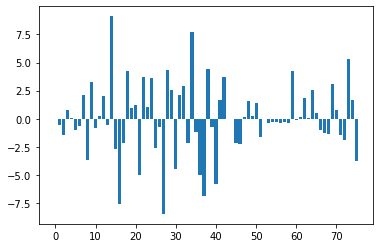

In [57]:
# summarize feature importance
for i,v in enumerate(importance):
#   sorted(zip(model.coef_, x.columns), reverse=True)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [58]:
# We can sort the features by their importance.
importance = sorted(zip(model.coef_, x.columns), reverse=True)
importance

[(9.115434152718942, 'occupation_sales_and_office'),
 (7.671057233437824, 'hh_with_income_less_than_10000'),
 (5.335946633012616, 'age_55-59'),
 (4.427176624306518, 'hh_with_income_35000-49999'),
 (4.324874021725285,
  'industry_professional_scientific_management_administrative_and_waste_management_services'),
 (4.265605368931045, 'hh_with_computer'),
 (4.250364743358513, 'disability_population_under_18'),
 (3.7434641894645533, 'industry_manufacturing'),
 (3.6760548190638898, 'hh_with_income_150000_and_greater'),
 (3.6132149996092755, 'industry_retail_trade'),
 (3.2600277918682496, 'race_two_or_more'),
 (3.0868282552021373, 'age_20-24'),
 (2.923753396275681, 'industry_public_administration'),
 (2.5821208496759613, 'disability_64_and_over_with_disability'),
 (2.5422630248072027,
  'industry_educational_services_health_care_and_social_assistance'),
 (2.1377041880444603, 'race_native_hawaiian_and_other_pacific_islander'),
 (2.09800545953021, 'industry_other_services_except_public_administ

In [90]:
# predict with the data
pred = model.predict(X_test)
pred1 =pd.DataFrame(pred, columns =['Estimated Access %'])
pred1.head()

,Estimated Access %
0,0.75
1,1.02
2,0.57
3,0.21
4,1.07


In [91]:
actual = pd.DataFrame(y_test)
actual = actual.reset_index(drop=True)
actual.head()

,level_up_access_pop_percent
0,0.88
1,0.93
2,0.91
3,0.02
4,0.89


In [92]:
ynew = pd.concat([actual, pred1], axis=1)
ynew

,level_up_access_pop_percent,Estimated Access %
0,0.88,0.75
1,0.93,1.02
2,0.91,0.57
3,0.02,0.21
4,0.89,1.07
5,0.87,0.74
6,0.91,0.81
7,0.76,0.73
8,1.00,1.07
9,0.89,0.65


ValueError: x and y must be the same size

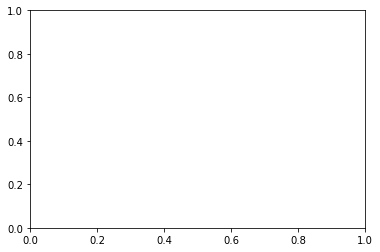

In [99]:
# Visualize Regression
residuals = (y - y_test)
plt.scatter(y_test, y)
plt.show()

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 76 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   population                                                                                58 non-null     int64  
 1   avg_household_size                                                                        58 non-null     float64
 2   sex_total_men                                                                             58 non-null     float64
 3   race_hispanic_or_latino                                                                   58 non-null     float64
 4   race_american_indian_and_alaska_native                                                    58 non-null     float64
 5   race_asian                                                 

ValueError: x and y must be the same size

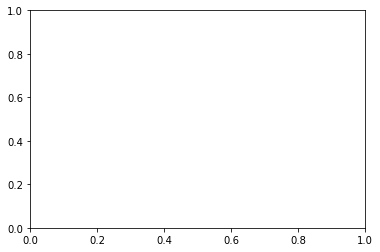

In [25]:
plt.scatter(x['population'], actual, color='red', alpha=0.4)
plt.scatter(x['population'], pred1, color='blue', alpha=0.4)
plt.xlabel('HH Avg Size')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

In [ ]:
plt.scatter(x['avg_household_size'], y_actual, color='red', alpha=0.4)
plt.scatter(x['avg_household_size'], y_pred, color='blue', alpha=0.4)
plt.xlabel('HH Avg Size')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

In [ ]:
plt.scatter(x['sex_total_men'], y_actual, color='red', alpha=0.4)
plt.scatter(x['sex_total_men'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Total Men (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

In [ ]:
plt.scatter(x['race_hispanic_or_latino'], y_actual, color='red', alpha=0.4)
plt.scatter(x['race_hispanic_or_latino'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Hispanic/Latino (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

In [ ]:
plt.scatter(x['race_american_indian_and_alaska_native'], y_actual, color='red', alpha=0.4)
plt.scatter(x['race_american_indian_and_alaska_native'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% American Indian/ Alaska Native (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

In [ ]:
plt.scatter(x['race_asian'], y_actual, color='red', alpha=0.4)
plt.scatter(x['race_asian'], y_pred, color='blue', alpha=0.4)
plt.xlabel('% Asian (per capita)')
plt.ylabel('Internet Access')
plt.title('Linear Regression Model for Internet Access Estimation');

### Random Forrest Model

In [170]:
rfmodel = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [171]:
rfmodel

RandomForestRegressor(random_state=0)

In [172]:
rfmodel.score(X_train, y_train)

0.9371182861974829

In [173]:
rfmodel.score(X_test, y_test)

0.4247180040654033

In [174]:
mse_pred1 = rfmodel.predict(X_test)
mean_squared_error(y_test, mse_pred1)

0.03029630208695066

In [175]:
rfmodel.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=209652396)

In [44]:
predictions = rfmodel.predict(X_test)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,predictions):.3f}")

ValueError: continuous is not supported

In [46]:
# Calculate feature importance in the Random Forest model.
importances = rfmodel.feature_importances_
importances

array([0.07762156, 0.00101909, 0.02465012, 0.00130854, 0.02352638,
       0.06313098, 0.00372584, 0.00274831, 0.02595566, 0.00130516,
       0.00219538, 0.01551688, 0.00157816, 0.00455615, 0.01410977,
       0.00597165, 0.00048403, 0.00102685, 0.00169471, 0.00068343,
       0.00753934, 0.00064569, 0.00315468, 0.00740276, 0.02356353,
       0.00215784, 0.0094498 , 0.00710748, 0.01545737, 0.26460491,
       0.00217637, 0.01233442, 0.00148336, 0.0008855 , 0.00444376,
       0.00076793, 0.00260366, 0.00264604, 0.01965138, 0.00280505,
       0.0013999 , 0.00157242, 0.00106755, 0.00930231, 0.00220616,
       0.00076531, 0.00224579, 0.00077643, 0.00057579, 0.00718745,
       0.00653858, 0.0612275 , 0.00329548, 0.00338954, 0.00045993,
       0.00889001, 0.00498632, 0.00989146, 0.00088224, 0.0071288 ,
       0.02604635, 0.03036465, 0.00225008, 0.00096991, 0.00923457,
       0.01693498, 0.02836651, 0.02097374, 0.0025871 , 0.01161617,
       0.00444673, 0.00954782, 0.00679578, 0.0024803 , 0.02957

In [48]:
# We can sort the features by their importance.
sorted(zip(rfmodel.feature_importances_, x.columns), reverse=True)

[(0.26460491007022624,
  'industry_educational_services_health_care_and_social_assistance'),
 (0.07762155992002336, 'population'),
 (0.06313098469236585, 'race_asian'),
 (0.06122750030317523, 'employment_not_in_labor_force'),
 (0.03036464533082198, 'disability_population_65_and_over'),
 (0.029578604313170147, 'age_60-84'),
 (0.028366512547010378, 'age_under_9'),
 (0.02604635077792155, 'disability_population_18-64'),
 (0.02595566499122111, 'race_some_other_race'),
 (0.02465012118396409, 'sex_total_men'),
 (0.023563530174329585, 'industry_retail_trade'),
 (0.023526377926219415, 'race_american_indian_and_alaska_native'),
 (0.020973740055862524, 'age_10-14'),
 (0.019651379981315657, 'hh_with_income_35000-49999'),
 (0.016934980064664703, 'citizenship_native_born'),
 (0.015516884790805744, 'occupation_population_16_and_over_total'),
 (0.01545736990705972,
  'industry_professional_scientific_management_administrative_and_waste_management_services'),
 (0.014109772604308454, 'occupation_sales_a

In [49]:
#Visualising the Random Forest Regression results

X_grid = np.arange(min(x), max(y))
X_grid = X_grid.reshape((len(X_grid)))
plt.scatter(x, y)
plt.plot(X_grid, regressor.predict(X_grid))
plt.title('Predicting Internet Access using Random Forest Regression ')
plt.xlabel('X')
plt.ylabel('% 100mb Internet Access')
plt.show()

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [137]:
x

,population,avg_household_size,sex_total_men,race_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,...,age_under_9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-84,age_85_and_over
0,64148,2.43,0.50,0.20,0.03,0.01,0.02,0.00,0.00,0.02,...,0.12,0.05,0.05,0.05,0.11,0.10,0.13,0.08,0.28,0.02
1,17540,2.13,0.51,0.11,0.02,0.01,0.01,0.00,0.00,0.04,...,0.09,0.04,0.05,0.05,0.11,0.09,0.13,0.09,0.34,0.02
2,75493,2.83,0.51,0.28,0.01,0.07,0.03,0.00,0.00,0.05,...,0.16,0.08,0.07,0.07,0.16,0.12,0.11,0.06,0.16,0.01
3,1133247,2.86,0.49,0.25,0.00,0.16,0.08,0.00,0.00,0.05,...,0.12,0.07,0.06,0.06,0.13,0.13,0.14,0.07,0.19,0.02
4,31185,2.23,0.66,0.19,0.03,0.01,0.09,0.01,0.00,0.02,...,0.09,0.05,0.05,0.10,0.20,0.14,0.13,0.06,0.18,0.01
5,443738,2.92,0.50,0.45,0.00,0.05,0.02,0.00,0.00,0.02,...,0.13,0.06,0.08,0.11,0.13,0.11,0.11,0.06,0.18,0.02
6,501317,2.60,0.49,0.27,0.00,0.04,0.01,0.00,0.00,0.03,...,0.11,0.06,0.06,0.06,0.13,0.12,0.13,0.07,0.23,0.02
7,180216,3.87,0.51,0.84,0.01,0.01,0.02,0.00,0.00,0.01,...,0.16,0.08,0.08,0.08,0.15,0.12,0.11,0.05,0.16,0.02
8,14174,2.86,0.52,0.27,0.02,0.02,0.00,0.00,0.01,0.02,...,0.09,0.06,0.04,0.09,0.16,0.11,0.14,0.09,0.20,0.01
9,1643700,2.81,0.49,0.22,0.00,0.29,0.10,0.01,0.00,0.04,...,0.12,0.06,0.06,0.06,0.17,0.15,0.14,0.06,0.17,0.02


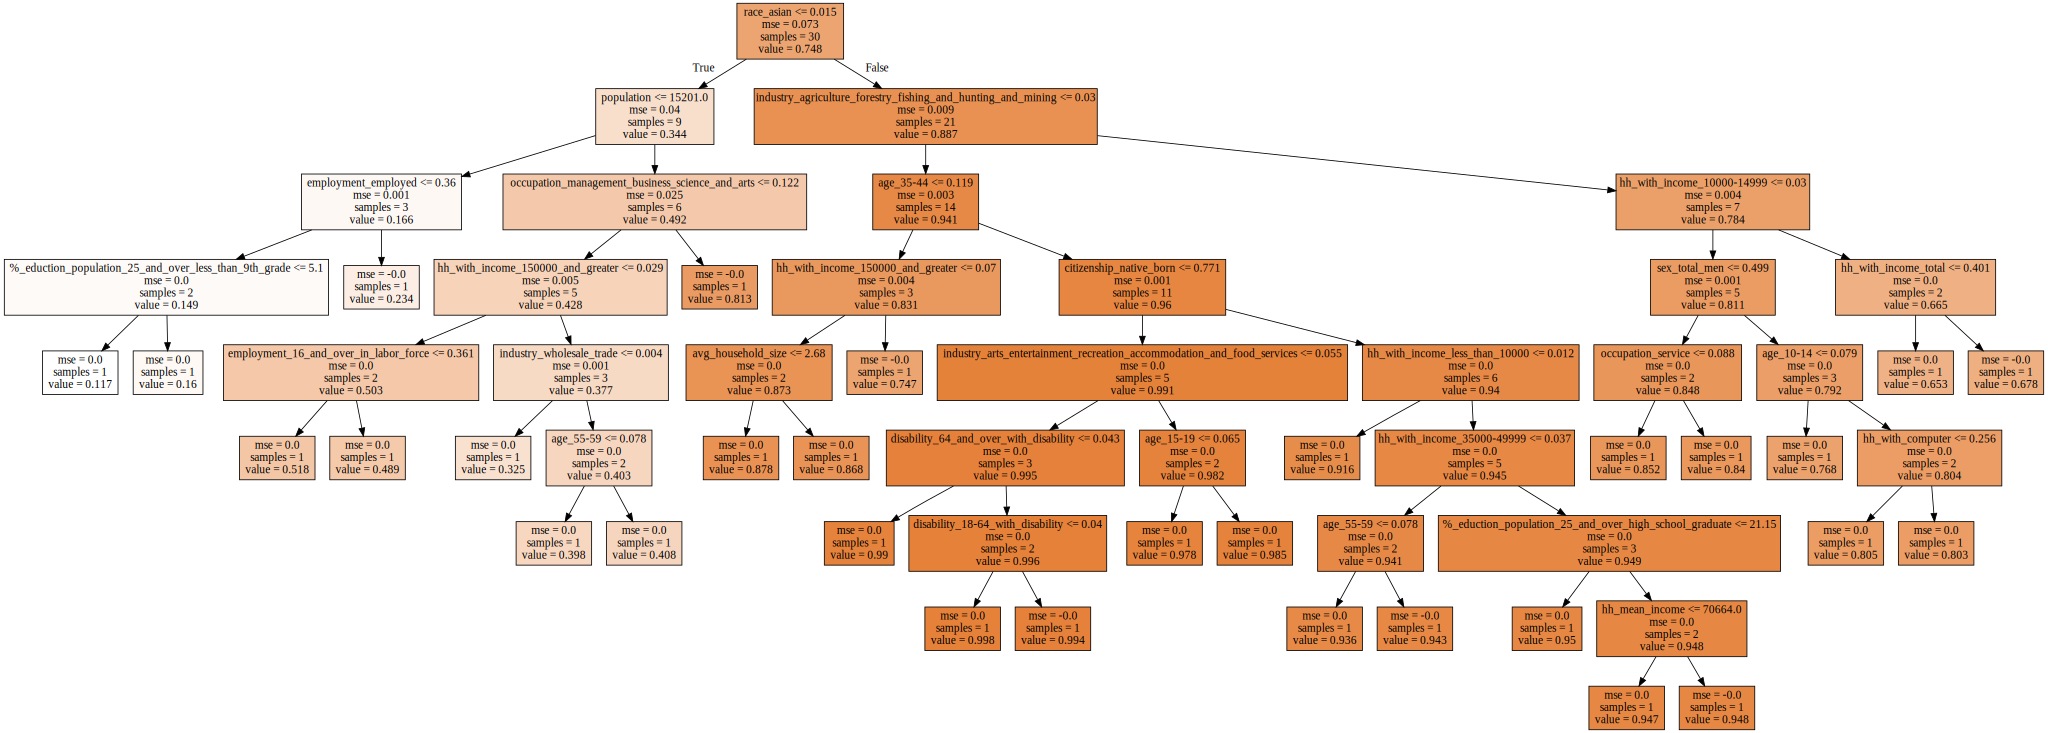

In [177]:
classification_tree = tree.export_graphviz(rfmodel.estimators_[1], out_file=None, 
                      feature_names= x.columns,  
                      class_names='y',  
                      filled=True)

graph = graphviz.Source(classification_tree)

graph 